In [1]:
import librosa
import librosa.display
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew


In [2]:
#get datasets from all cases, all channels, both normal and abnormal
datapath = r'C:\Users\brech\THESIS_local\ToyADMOS\ToycarCSV.csv'
data_csv = pd.read_csv(datapath)

def find_path_to_wav(full_sample_name):
    for root, dirs, files in os.walk(os.path.dirname(datapath)):
        for name in files:
            if name == full_sample_name:
                path_to_wavFile = os.path.abspath(os.path.join(root, name))
                return path_to_wavFile


def get_sample_waveform_normalised(full_sample_name, start = 0, stop = 11):
    #returns waveform values, cut to seconds going from start to stop
    sample_path = find_path_to_wav(full_sample_name)
    waveform, sample_rate = librosa.load(sample_path, sr= None)
    waveform = waveform[start*sample_rate : stop*sample_rate]
        
    return librosa.util.normalize(waveform)
  
def access_data(normal_or_abnormal: str, case: int, channel: int):
    case_str = "case"+ str(case)
    channel_str = "ch"+str(channel)
    data_case_ch = data_csv[(data_csv["norm/ab"] == normal_or_abnormal) & (data_csv["Case"] == case_str) & (data_csv["Channel"] == channel_str)]
    return data_case_ch

Start with time-domain features:

https://devopedia.org/audio-feature-extraction, zie ook paper
Time domain:
shimmer, amplitude envelope, attack time, auto-correlation coefficients, Energy features
Energy, Peak-to-Sidelobe ratio (PSR) from the Hilbert Envelope of the LP Residual, 
Normalized Autocorrelation Peak Strength (NAPS) of Zero frequency filtered signal

Freq domain:
Spectral Flux, Spectral Rolloff, Chroma, Log Mel spectrum energy, Harmonic ratio, Modulation spectrum energy, Pitch
Band energy ratio, Envelope Analysis, Spectral Kurtosis,  Wavelet Transform, 
Cyclic Spectral Analysis (CSA)

Time domain: waveform plots

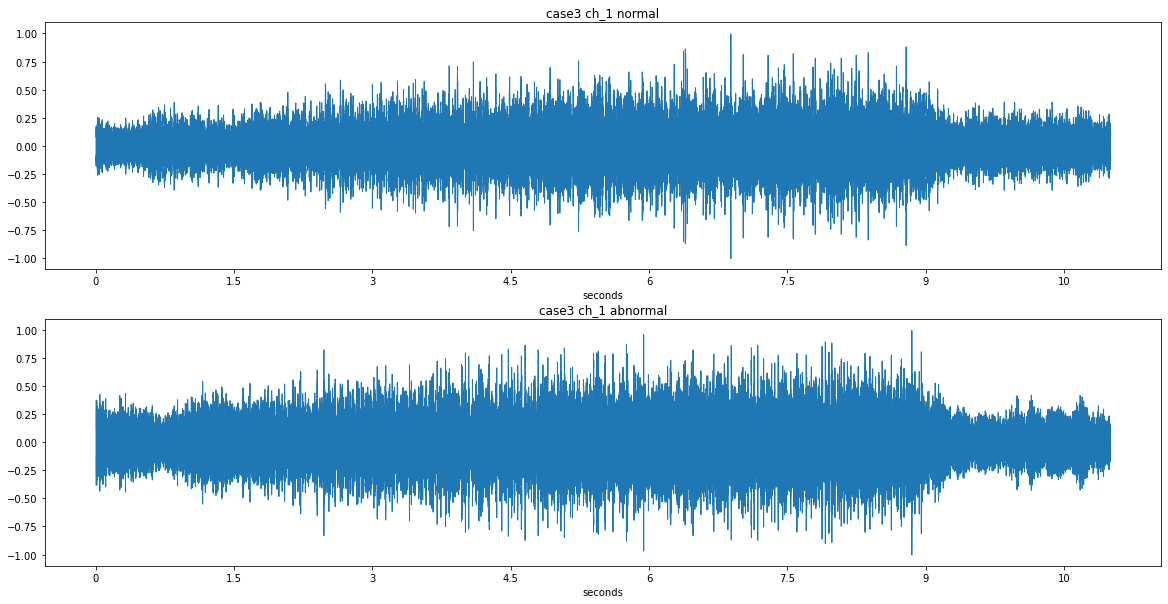

In [3]:
waveform_c3_ch1_normal = get_sample_waveform_normalised(access_data("normal",3,1).iloc()[10][0])
waveform_c3_ch1_abnormal = get_sample_waveform_normalised(access_data("abnormal",3,1).iloc()[10][0])

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
librosa.display.waveshow(y = waveform_c3_ch1_normal, sr = 16000 )
plt.xlabel("seconds")
plt.title("case3 ch_1 normal")

plt.subplot(2,1,2)
librosa.display.waveshow(y = waveform_c3_ch1_abnormal, sr = 16000 )
plt.title("case3 ch_1 abnormal")
plt.xlabel("seconds")
plt.show()

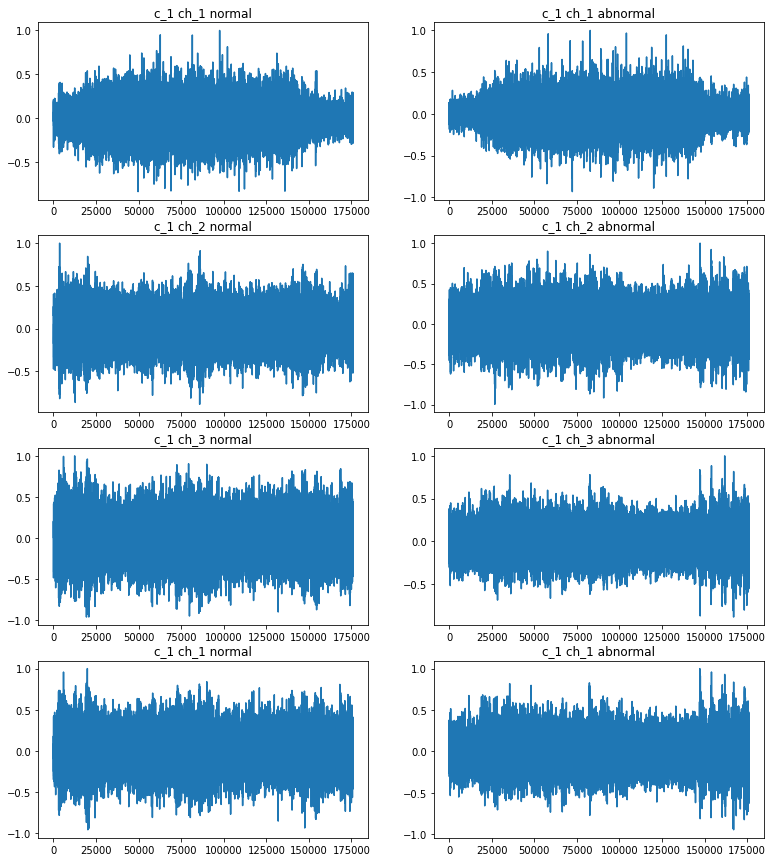

In [4]:
#plot waveform of case 1 all channels, both a normal sample and an abnormal sample
plt.figure(figsize = (13,15))
plt.subplot(4,2,1)
plt.plot(get_sample_waveform_normalised(data_case1_ch_1_normal.iloc()[1][0]))
plt.title("c_1 ch_1 normal")

plt.subplot(4,2,2)
plt.plot(get_sample_waveform_normalised(data_case1_ch_1_abnormal.iloc()[1][0]))
plt.title("c_1 ch_1 abnormal")

plt.subplot(4,2,3)
plt.plot(get_sample_waveform_normalised(data_case1_ch_2_normal.iloc()[1][0]))
plt.title("c_1 ch_2 normal")

plt.subplot(4,2,4)
plt.plot(get_sample_waveform_normalised(data_case1_ch_2_abnormal.iloc()[1][0]))
plt.title("c_1 ch_2 abnormal")

plt.subplot(4,2,5)
plt.plot(get_sample_waveform_normalised(data_case1_ch_3_normal.iloc()[1][0]))
plt.title("c_1 ch_3 normal")

plt.subplot(4,2,6)
plt.plot(get_sample_waveform_normalised(data_case1_ch_3_abnormal.iloc()[1][0]))
plt.title("c_1 ch_3 abnormal")

plt.subplot(4,2,7)
plt.plot(get_sample_waveform_normalised(data_case1_ch_4_normal.iloc()[1][0]))
plt.title("c_1 ch_1 normal")

plt.subplot(4,2,8)
plt.plot(get_sample_waveform_normalised(data_case1_ch_4_abnormal.iloc()[1][0]))
plt.title("c_1 ch_1 abnormal")

plt.show()

Time domain: RMS

get RMS of 1 waveform

get RMS of all normal waveform compared to all abnormal waveform

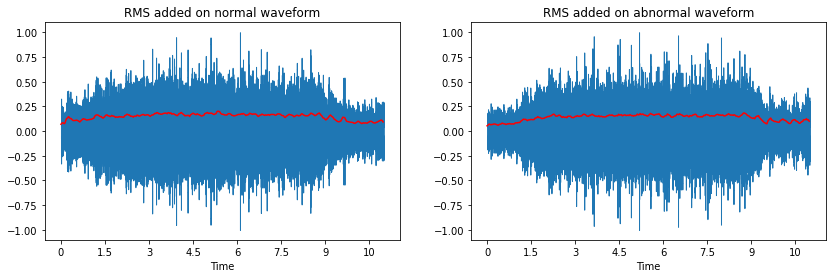

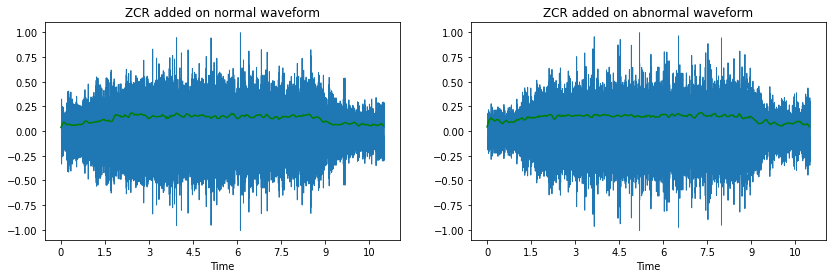

In [5]:
waveform_c1ch1_normal = get_sample_waveform_normalised(data_case1_ch_1_normal.iloc()[1][0])
waveform_c1ch1_abnormal = get_sample_waveform_normalised(data_case1_ch_1_abnormal.iloc()[1][0])

rms_c1ch1_normal = librosa.feature.rms(y = waveform_c1ch1_normal)[0]
rms_c1ch1_abnormal = librosa.feature.rms(y = waveform_c1ch1_abnormal)[0]

zcr_c1ch1_normal = librosa.feature.zero_crossing_rate(y = waveform_c1ch1_normal)[0]
zcr_c1ch1_abnormal = librosa.feature.zero_crossing_rate(y = waveform_c1ch1_abnormal)[0]

frames_c1ch1_norm = range(len(rms_c1ch1_normal))
t_norm = librosa.frames_to_time(frames_c1ch1_norm, sr = 16000)

frames_c1ch1_abnorm = range(len(rms_c1ch1_abnormal))
t_abnorm = librosa.frames_to_time(frames_c1ch1_abnorm, sr = 16000)

plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
librosa.display.waveshow(y = waveform_c1ch1_normal, sr = 16000 )
plt.plot(t_norm, rms_c1ch1_normal, color="r")
plt.title("RMS added on normal waveform")

plt.subplot(1,2,2)
librosa.display.waveshow(y = waveform_c1ch1_abnormal, sr = 16000)
plt.plot(t_abnorm, rms_c1ch1_abnormal, color="r")
plt.title("RMS added on abnormal waveform")
plt.show()
#########################################

plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
librosa.display.waveshow(y = waveform_c1ch1_normal, sr = 16000 )
plt.plot(t_norm, zcr_c1ch1_normal, color="g")
plt.title("ZCR added on normal waveform")

plt.subplot(1,2,2)
librosa.display.waveshow(y = waveform_c1ch1_abnormal, sr = 16000)
plt.plot(t_abnorm, zcr_c1ch1_abnormal, color="g")
plt.title("ZCR added on abnormal waveform")

plt.show()


In [123]:

def get_rms_zcr_of_all_channels(case_number:int):
    #normal-abnormal pair per channel
    datas = [[access_data("normal", case_number, i + 1), access_data("abnormal", case_number, i + 1)] for i in range(4)]
    
    results_dict = {}
    for ch_index, data in enumerate(datas):
        normal_data, abnormal_data = data
        
        rms_normal = []
        zcr_normal = []
        for i in range(len(normal_data)):    
            waveform_normal = get_sample_waveform_normalised(normal_data.iat[i,0])
            S, phase = librosa.magphase(librosa.stft(waveform_normal, window=np.ones,center=False, n_fft=len(waveform_normal)))
            rms_norm = librosa.feature.rms(S=S, frame_length=len(waveform_normal))
            zcr_norm = np.mean(librosa.feature.zero_crossing_rate(waveform_normal)[0])
            
            rms_normal.append(rms_norm.item())
            zcr_normal.append(zcr_norm)
            
        rms_abnormal = []
        zcr_abnormal = []
        for i in range(len(abnormal_data)):    
            waveform_abnormal = get_sample_waveform_normalised(abnormal_data.iat[i,0])
            S, phase = librosa.magphase(librosa.stft(waveform_abnormal, window=np.ones,center=False, n_fft=len(waveform_abnormal)))
            rms_abnorm = librosa.feature.rms(S=S, frame_length=len(waveform_abnormal))
            zcr_abnorm = np.mean(librosa.feature.zero_crossing_rate(waveform_abnormal)[0])

            rms_abnormal.append(rms_abnorm.item())
            zcr_abnormal.append(zcr_abnorm)
            
        results_dict.update([(f'rms_normal_case{case_number}_channel{ch_index+1}', rms_normal),
                             (f'rms_abnormal_case{case_number}_channel{ch_index+1}',rms_abnormal),
                             (f'zcr_normal_case{case_number}_channel{ch_index+1}',zcr_normal),
                             (f'zcr_abnormal_case{case_number}_channel{ch_index+1}',zcr_abnormal)])

    return results_dict

In [ ]:
case3_rms_zcr = get_rms_zcr_of_all_channels(case_number=3)

rms_normal_case3_ch1 = case3_rms_zcr.get("rms_normal_case3_channel1")
rms_abnormal_case3_ch1 = case3_rms_zcr.get("rms_abnormal_case3_channel1")
plt.figure(figsize = (20,25))
plt.subplot(8,1,1)
plt.title(f"RMS of healthy and unhealthy samples from case 3, channel 1 ")
plt.plot(rms_normal_case3_ch1, color="r")
plt.plot(range(len(rms_normal_case3_ch1), len(rms_normal_case3_ch1)+len(rms_abnormal_case3_ch1)), rms_abnormal_case3_ch1, color="b")

zcr_normal_case3_ch1 = case3_rms_zcr.get("zcr_normal_case3_channel1")
zcr_abnormal_case3_ch1 = case3_rms_zcr.get("zcr_abnormal_case3_channel1")                                           
plt.subplot(8,1,2)
plt.title(f"ZCR of healthy and unhealthy samples from case 3, channel 1 ")
plt.plot(zcr_normal_case3_ch1, color="r")
plt.plot(range(len(zcr_normal_case3_ch1), len(zcr_normal_case3_ch1)+len(zcr_abnormal_case3_ch1)), zcr_abnormal_case3_ch1, color="b")

rms_normal_case3_ch2 = case3_rms_zcr.get("rms_normal_case3_channel2")
rms_abnormal_case3_ch2 = case3_rms_zcr.get("rms_abnormal_case3_channel2")
plt.subplot(8,1,3)
plt.title(f"RMS of healthy and unhealthy samples from case 3, channel 2 ")
plt.plot(rms_normal_case3_ch2, color="r")
plt.plot(range(len(rms_normal_case3_ch2), len(rms_normal_case3_ch2)+len(rms_abnormal_case3_ch2)), rms_abnormal_case3_ch2, color="b")

zcr_normal_case3_ch2 = case3_rms_zcr.get("zcr_normal_case3_channel2")
zcr_abnormal_case3_ch2 = case3_rms_zcr.get("zcr_abnormal_case3_channel2")
plt.subplot(8,1,4)
plt.title(f"ZCR of healthy and unhealthy samples from case 3, channel 2 ")
plt.plot(zcr_normal_case3_ch2, color="r")
plt.plot(range(len(zcr_normal_case3_ch2), len(zcr_normal_case3_ch2)+len(zcr_abnormal_case3_ch2)), zcr_abnormal_case3_ch2, color="b")

rms_normal_case3_ch3 = case3_rms_zcr.get("rms_normal_case3_channel3")
rms_abnormal_case3_ch3 = case3_rms_zcr.get("rms_abnormal_case3_channel3")
plt.subplot(8,1,5)
plt.title(f"RMS of healthy and unhealthy samples from case 3, channel 3 ")
plt.plot(rms_normal_case3_ch3, color="r")
plt.plot(range(len(rms_normal_case3_ch3), len(rms_normal_case3_ch3)+len(rms_abnormal_case3_ch3)), rms_abnormal_case3_ch3, color="b")

zcr_normal_case3_ch3 = case3_rms_zcr.get("zcr_normal_case3_channel3")
zcr_abnormal_case3_ch3 = case3_rms_zcr.get("zcr_abnormal_case3_channel3")
plt.subplot(8,1,6)
plt.title(f"ZCR of healthy and unhealthy samples from case 3, channel 3 ")
plt.plot(zcr_normal_case3_ch3, color="r")
plt.plot(range(len(zcr_normal_case3_ch3), len(zcr_normal_case3_ch3)+len(zcr_abnormal_case3_ch3)), zcr_abnormal_case3_ch3, color="b")

rms_normal_case3_ch4 = case3_rms_zcr.get("rms_normal_case3_channel4")
rms_abnormal_case3_ch4 = case3_rms_zcr.get("rms_abnormal_case3_channel4")
plt.subplot(8,1,7)
plt.title(f"RMS of healthy and unhealthy samples from case 3, channel 4 ")
plt.plot(rms_normal_case3_ch4, color="r")
plt.plot(range(len(rms_normal_case3_ch4), len(rms_normal_case3_ch4)+len(rms_abnormal_case3_ch4)), rms_abnormal_case3_ch4, color="b")

zcr_normal_case3_ch4 = case3_rms_zcr.get("zcr_normal_case3_channel4")
zcr_abnormal_case3_ch4 = case3_rms_zcr.get("zcr_abnormal_case3_channel4")
plt.subplot(8,1,8)
plt.title(f"ZCR of healthy and unhealthy samples from case 3, channel 4 ")
plt.plot(zcr_normal_case3_ch4, color="r")
plt.plot(range(len(zcr_normal_case3_ch4), len(zcr_normal_case3_ch4)+len(zcr_abnormal_case3_ch4)), zcr_abnormal_case3_ch4, color="b")


plt.show()


In [ ]:
#RMS Boxplots
import matplotlib.patches as mpatches
def setBoxColors(bp):
    plt.setp(bp['boxes'][0], color='red')
    plt.setp(bp['caps'][0], color='red')
    plt.setp(bp['caps'][1], color='red')
    plt.setp(bp['whiskers'][0], color='red')
    plt.setp(bp['whiskers'][1], color='red')
    plt.setp(bp['fliers'][0], color='red')
    plt.setp(bp['fliers'][1], color='red')
    plt.setp(bp['medians'][0], color='red')

    plt.setp(bp['boxes'][1], color='blue')
    plt.setp(bp['caps'][2], color='blue')
    #plt.setp(bp['caps'][3], color='red')
    plt.setp(bp['whiskers'][2], color='blue')
    #plt.setp(bp['whiskers'][3], color='red')
    #plt.setp(bp['fliers'][2], color='red')
    #plt.setp(bp['fliers'][3], color='red')
    plt.setp(bp['medians'][1], color='blue')


In [ ]:
#RMS boxplot
A = [rms_normal_case3_ch1, rms_abnormal_case3_ch1]
B = [rms_normal_case3_ch2, rms_abnormal_case3_ch2]
C = [rms_normal_case3_ch3, rms_abnormal_case3_ch3]
D = [rms_normal_case3_ch4, rms_abnormal_case3_ch4]

plt.figure()
ax = plt.axes()

bp = plt.boxplot(A, positions = [1, 2], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(B, positions = [4, 5], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(C, positions = [7, 8], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(D, positions = [10, 11], widths = 0.6)
setBoxColors(bp)

# set axes limits and labels
ax.set_xticklabels(['RMS_ch1', " ", 'RMS_ch2',' ', 'RMS_ch3', '', 'RMS_ch4', ''])
 
# draw temporary red and blue lines and use them to create a legend


red_patch = mpatches.Patch(color='red', label='Normal data')
blue_patch = mpatches.Patch(color='blue', label='Abnormal data')

plt.legend(handles=[red_patch, blue_patch])
plt.title("Root mean square overview of case 3")
plt.show()


In [ ]:
#ZCR boxplot
A = [zcr_normal_case3_ch1, zcr_abnormal_case3_ch1]
B = [zcr_normal_case3_ch2, zcr_abnormal_case3_ch2]
C = [zcr_normal_case3_ch3, zcr_abnormal_case3_ch3]
D = [zcr_normal_case3_ch4, zcr_abnormal_case3_ch4]

plt.figure()
ax = plt.axes()

bp = plt.boxplot(A, positions = [1, 2], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(B, positions = [4, 5], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(C, positions = [7, 8], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(D, positions = [10, 11], widths = 0.6)
setBoxColors(bp)

# set axes limits and labels
ax.set_xticklabels(['ZCR_ch1', ' ', 'ZCR_ch2',' ', 'ZCR_ch3', '', 'ZCR_ch4', ' '])
 
# draw temporary red and blue lines and use them to create a legend


red_patch = mpatches.Patch(color='red', label='Normal data')
blue_patch = mpatches.Patch(color='blue', label='Abnormal data')

plt.legend(handles=[red_patch, blue_patch])
plt.title("Zero Crossing rate overview of case 3")
plt.show()


Time domain: kurtosis of 2 sample signals 

Kurtosis of case 3 all normal samples compared to abnormal samples

In [125]:
def get_kurtosis_of_all_channels(case_number:int):
    #normal-abnormal pairs per channel
    datas = [[access_data("normal", case_number, i + 1), access_data("abnormal", case_number, i + 1)] for i in range(4)]
    results_dict = {}
    
    for ch_index, data in enumerate(datas):
        normal_data, abnormal_data = data
        
        kurtosis_normal = []
        for i in range(len(normal_data)):    
            kurtosis_waveform_case1 = get_sample_waveform_normalised(normal_data.iat[i,0])
            kurtosis_res = kurtosis(kurtosis_waveform_case1)
            kurtosis_normal.append(kurtosis_res)
                    
        
        kurtosis_abnormal = []
        for i in range(len(abnormal_data)):    
            kurtosis_waveform_case1 = get_sample_waveform_normalised(abnormal_data.iat[i,0])
            kurtosis_res = kurtosis(kurtosis_waveform_case1)
            kurtosis_abnormal.append(kurtosis_res)
            
        results_dict.update([(f'kurtosis_normal_case{case_number}_channel{ch_index+1}', kurtosis_normal),
                             (f'kurtosis_abnormal_case{case_number}_channel{ch_index+1}',kurtosis_abnormal),
                             ])

    return results_dict

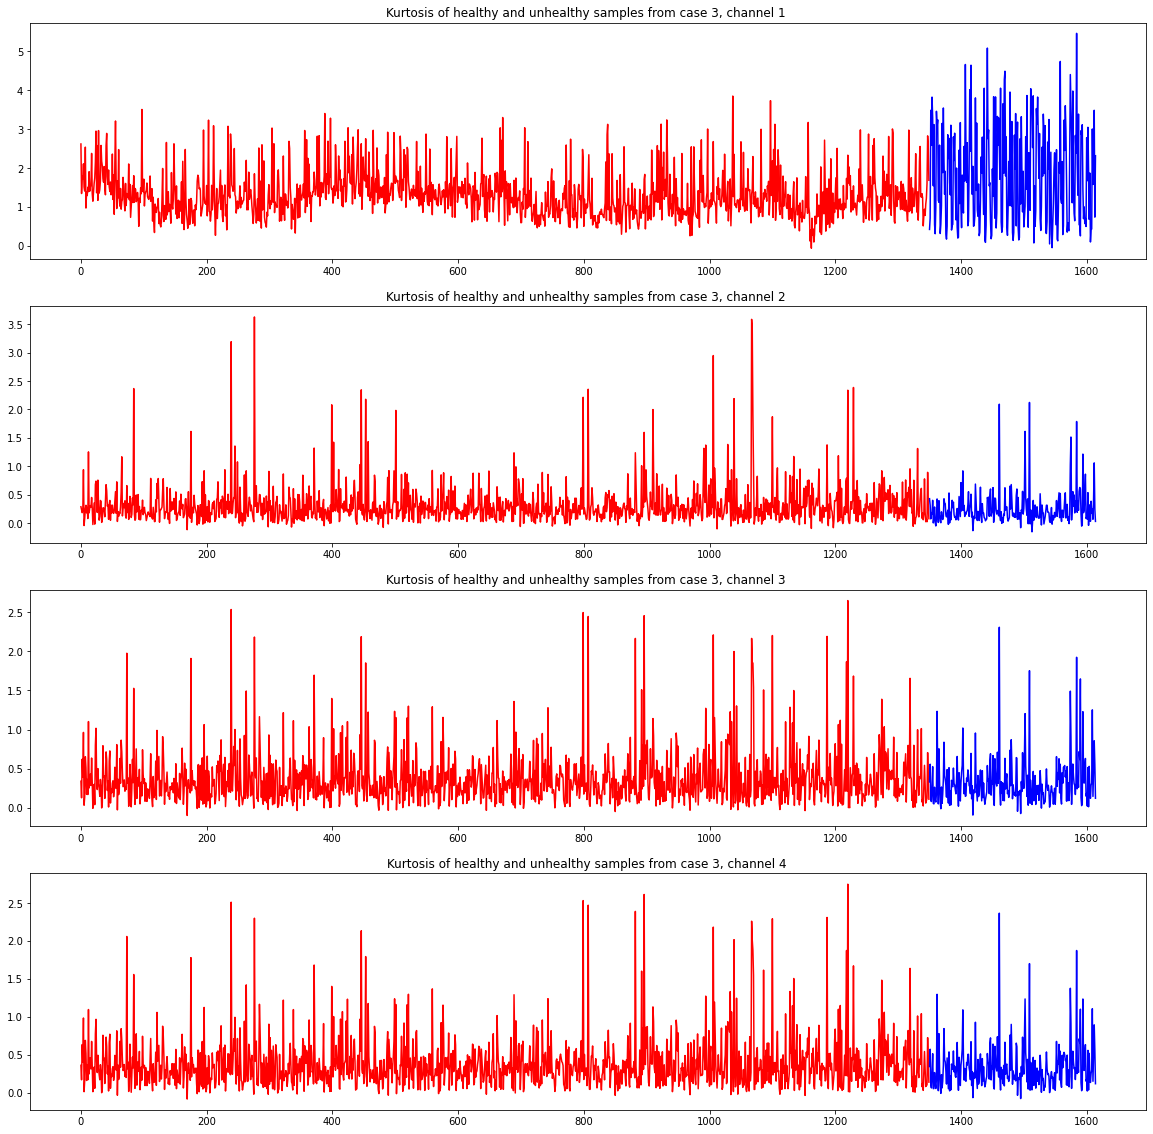

In [126]:
#kurtosis from case 3
"""Een hoge kurtosis wijst op een verdeling met lage kans op extreme uitschieters, vanwege de staartvorm. 
Dit houdt in dat een relatief groot deel van de variantie veroorzaakt wordt door zeldzame extreme waarden. 
Een lage kurtosis wijst op een platte verdeling.  Hier wordt de variantie voornamelijk veroorzaakt door een groter deel minder extreme waarden.
One can say it is a measure of how heavy the tail is compared to a normal distribution.
Higher kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean.
"""
################################################################################################
case3_kurtosis = get_kurtosis_of_all_channels(case_number=3)
    
kurtosis_ch1_normal_results = case3_kurtosis.get('kurtosis_normal_case3_channel1')   
kurtosis_ch1_abnormal_results = case3_kurtosis.get('kurtosis_abnormal_case3_channel1')    
plt.figure(figsize = (20,20))
plt.subplot(4,1,1)
plt.title(f"Kurtosis of healthy and unhealthy samples from case 3, channel 1 ")
plt.plot(kurtosis_ch1_normal_results, color="r")
plt.plot(range(len(kurtosis_ch1_normal_results), len(kurtosis_ch1_normal_results)+len(kurtosis_ch1_abnormal_results)), kurtosis_ch1_abnormal_results, color="b")

kurtosis_ch2_normal_results = case3_kurtosis.get('kurtosis_normal_case3_channel2')   
kurtosis_ch2_abnormal_results = case3_kurtosis.get('kurtosis_abnormal_case3_channel2')    
plt.subplot(4,1,2)
plt.title(f"Kurtosis of healthy and unhealthy samples from case 3, channel 2 ")
plt.plot(kurtosis_ch2_normal_results, color="r")
plt.plot(range(len(kurtosis_ch2_normal_results), len(kurtosis_ch2_normal_results)+len(kurtosis_ch2_abnormal_results)), kurtosis_ch2_abnormal_results, color="b")

kurtosis_ch3_normal_results = case3_kurtosis.get('kurtosis_normal_case3_channel3')   
kurtosis_ch3_abnormal_results = case3_kurtosis.get('kurtosis_abnormal_case3_channel3')    
plt.subplot(4,1,3)
plt.title(f"Kurtosis of healthy and unhealthy samples from case 3, channel 3 ")
plt.plot(kurtosis_ch3_normal_results, color="r")
plt.plot(range(len(kurtosis_ch3_normal_results), len(kurtosis_ch3_normal_results)+len(kurtosis_ch3_abnormal_results)), kurtosis_ch3_abnormal_results, color="b")

kurtosis_ch4_normal_results = case3_kurtosis.get('kurtosis_normal_case3_channel4')   
kurtosis_ch4_abnormal_results = case3_kurtosis.get('kurtosis_abnormal_case3_channel4')    
plt.subplot(4,1,4)
plt.title(f"Kurtosis of healthy and unhealthy samples from case 3, channel 4 ")
plt.plot(kurtosis_ch4_normal_results, color="r")
plt.plot(range(len(kurtosis_ch4_normal_results), len(kurtosis_ch4_normal_results)+len(kurtosis_ch4_abnormal_results)), kurtosis_ch4_abnormal_results, color="b")

plt.show()


    
    

In [ ]:
#Kurtosis boxplot
A = [kurtosis_ch1_normal_results, kurtosis_ch1_abnormal_results]
B = [kurtosis_ch2_normal_results, kurtosis_ch2_abnormal_results]
C = [kurtosis_ch3_normal_results, kurtosis_ch3_abnormal_results]
D = [kurtosis_ch4_normal_results, kurtosis_ch4_abnormal_results]

plt.figure()
ax = plt.axes()

bp = plt.boxplot(A, positions = [1, 2], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(B, positions = [4, 5], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(C, positions = [7, 8], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(D, positions = [10, 11], widths = 0.6)
setBoxColors(bp)

# set axes limits and labels
ax.set_xticklabels(['kurtosis_ch1', ' ', 'kurtosis_ch2',' ', 'kurtosis_ch3', '', 'kurtosis_ch4', ' '])
 
# draw temporary red and blue lines and use them to create a legend
red_patch = mpatches.Patch(color='red', label='Normal data')
blue_patch = mpatches.Patch(color='blue', label='Abnormal data')

plt.legend(handles=[red_patch, blue_patch])
plt.title("Kurtosis overview of case 3")
plt.show()


Time Domain: Skewness and Variance/standard deviation

Skewness measures a signal's asymmetrical spread about its mean value.

Time Domain: Variance/standard deviation

Variance ==  avg(squared deviations from the mean)    [expressed in much larger units]
STD = sqrt(var)    [in same units as original values]

measure of how dispersed the data is in relation to the mean.

In [133]:
#Of case 3, all channels
"""
For normally distributed data, the skewness should be about zero
"""
def get_skewness_of_all_channels(case_number:int):
    #normal-abnormal pairs per channel
    datas = [[access_data("normal", case_number, i + 1), access_data("abnormal", case_number, i + 1)] for i in range(4)]
    results_dict = {}
    
    for ch_index, data in enumerate(datas): #loop over the four channels
        normal_data, abnormal_data = data
        
        skewness_normal = []
        for i in range(len(normal_data)):    
            waveform_normal = get_sample_waveform_normalised(normal_data.iat[i,0])
            skewness = skew(waveform_normal)
            skewness_normal.append(skewness)
                    
        skewness_abnormal = []
        for i in range(len(abnormal_data)):    
            waveform_abnormal = get_sample_waveform_normalised(abnormal_data.iat[i,0])
            skewness = skew(waveform_abnormal)
            skewness_abnormal.append(skewness)
            
        results_dict.update([(f'skewness_normal_case{case_number}_channel{ch_index+1}', skewness_normal),
                             (f'skewness_abnormal_case{case_number}_channel{ch_index+1}',skewness_abnormal),
                             ])
        results_dict.update([(f'skewness_avg_normal_case{case_number}_channel{ch_index+1}', np.average(skewness_normal)),
                            (f'skewness_avg_abnormal_case{case_number}_channel{ch_index+1}',np.average(skewness_abnormal)),
                            ])
    return results_dict

In [134]:
def get_std_of_all_channels(case_number:int):
    #normal-abnormal pairs per channel
    datas = [[access_data("normal", case_number, i + 1), access_data("abnormal", case_number, i + 1)] for i in range(4)]
    results_dict = {}
    
    for ch_index, data in enumerate(datas): #loop over the four channels
        normal_data, abnormal_data = data
        
        std_normal = []
        for i in range(len(normal_data)):    
            waveform_normal = get_sample_waveform_normalised(normal_data.iat[i,0])
            std = np.std(waveform_normal)
            std_normal.append(std)
                    
        std_abnormal = []
        for i in range(len(abnormal_data)):    
            waveform_abnormal = get_sample_waveform_normalised(abnormal_data.iat[i,0])
            std = np.std(waveform_abnormal)
            std_abnormal.append(std)
            
        results_dict.update([(f'std_normal_case{case_number}_channel{ch_index+1}', std_normal),
                             (f'std_abnormal_case{case_number}_channel{ch_index+1}',std_abnormal),
                             ])
        results_dict.update([(f'std_avg_normal_case{case_number}_channel{ch_index+1}', np.average(std_normal)),
                            (f'std_avg_abnormal_case{case_number}_channel{ch_index+1}',np.average(std_abnormal)),
                            ])
    return results_dict

Time domain: Crest factor, shape factor, Impulse factor, clearance factor
using following formulas\
CF = max(abs(signal))/rms(signal);% crest factor \
CREST FACTOR: shows the ratio of peak values to the effective value. In other words, crest factor indicates how extreme the peaks are in a waveform. Crest factor 1 indicates no peaks, such as direct current or a square wave. Higher crest factors indicate peaks, for example sound waves tend to have high crest factors. Faults often first manifest themselves in changes in the peakiness of a signal 

SF = rms(signal)/mean(abs(signal)); \
Shape factor is dependent on the signal shape while being independent of the signal dimensions\

IF = max(abs(signal))/mean(abs(signal))\
Compare the height of a peak to the mean level of the signal.\

CLF = max(abs(signal))/(mean(abs(signal).^(1/2))).^2\
For rotating machinery, this feature is maximum for healthy bearings and goes on decreasing for defective ball, defective outer race, and defective inner race respectively. The clearance factor has the highest separation ability for defective inner race faults

In [143]:
def get_time_coefficients_of_all_channels(case_number:int):
    """Funtion returns dictionary of the Crest factor, Shape factor, Inference factor and CLF factor for all channels
    (of a given case number)
    """
    #normal-abnormal pair per channel
    datas = [[access_data("normal", case_number, i + 1), access_data("abnormal", case_number, i + 1)] for i in range(4)]
    
    results_dict = {}
    for ch_index, data in enumerate(datas): #loop over each channel
        normal_data, abnormal_data = data
        
        CF_normal = np.empty(len(normal_data))
        SF_normal = np.empty(len(normal_data))
        IF_normal = np.empty(len(normal_data))
        CLF_normal = np.empty(len(normal_data))
        for i in range(len(normal_data)): #loop over data of 1 channel   
            waveform_normal = get_sample_waveform_normalised(normal_data.iat[i,0])
            S, phase = librosa.magphase(librosa.stft(waveform_normal, window=np.ones,center=False, n_fft=len(waveform_normal)))
            rms_norm = librosa.feature.rms(S=S, frame_length=len(waveform_normal))
            rms_item = rms_norm.item()
            
            CF = np.max(np.abs(waveform_normal))/rms_item
            SF = rms_item/np.mean(np.abs(waveform_normal))
            IF = np.max(np.abs(waveform_normal))/np.mean(np.abs(waveform_normal))
            CLF = np.max(np.abs(waveform_normal))/np.square(np.mean(np.sqrt(np.abs(waveform_normal))))
        
            CF_normal[i] = CF
            SF_normal[i] = SF
            IF_normal[i] = IF
            CLF_normal[i] = CLF

            
        CF_abnormal = np.empty(len(abnormal_data))
        SF_abnormal = np.empty(len(abnormal_data))
        IF_abnormal = np.empty(len(abnormal_data))
        CLF_abnormal = np.empty(len(abnormal_data))
        for i in range(len(abnormal_data)):    
            waveform_abnormal = get_sample_waveform_normalised(abnormal_data.iat[i,0])
            S, phase = librosa.magphase(librosa.stft(waveform_abnormal, window=np.ones,center=False, n_fft=len(waveform_abnormal)))
            rms_abnorm = librosa.feature.rms(S=S, frame_length=len(waveform_abnormal))
            rms_item = rms_abnorm.item()
            
            CF = np.max(np.abs(waveform_abnormal))/rms_item
            SF = rms_item/np.mean(np.abs(waveform_abnormal))
            IF = np.max(np.abs(waveform_abnormal))/np.mean(np.abs(waveform_abnormal))
            CLF = np.max(np.abs(waveform_abnormal))/np.square(np.mean(np.sqrt(np.abs(waveform_abnormal))))
        
            CF_abnormal[i] = CF
            SF_abnormal[i] = SF
            IF_abnormal[i] = IF
            CLF_abnormal[i] = CLF
            
        results_dict.update([(f'CF_normal_case{case_number}_channel{ch_index+1}', CF_normal.tolist()),
                             (f'CF_abnormal_case{case_number}_channel{ch_index+1}',CF_abnormal.tolist()),
                             (f'SF_normal_case{case_number}_channel{ch_index+1}', SF_normal.tolist()),
                             (f'SF_abnormal_case{case_number}_channel{ch_index+1}',SF_abnormal.tolist()),
                             (f'IF_normal_case{case_number}_channel{ch_index+1}', IF_normal.tolist()),
                             (f'IF_abnormal_case{case_number}_channel{ch_index+1}',IF_abnormal.tolist()),
                             (f'CLF_normal_case{case_number}_channel{ch_index+1}', CLF_normal.tolist()),
                             (f'CLF_abnormal_case{case_number}_channel{ch_index+1}',CLF_abnormal.tolist()),
                             ])

    return results_dict

In [ ]:
case3_time_coefficients = get_time_coefficients_of_all_channels(case_number=3)
case3_time_coefficients.keys()

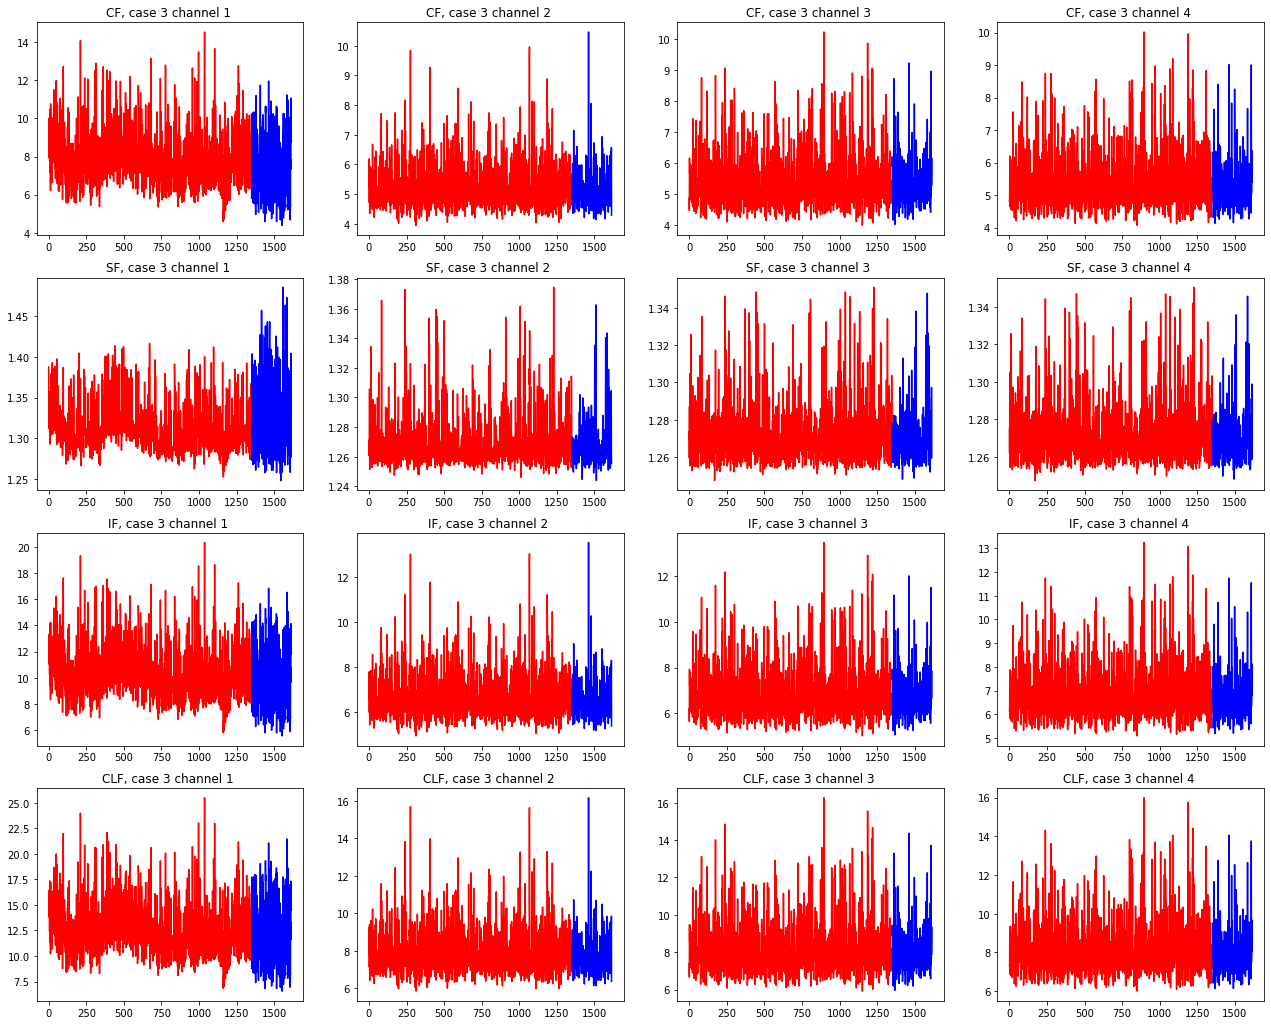

In [151]:
#plotting the time coefficients    
CF_normal_case3_ch1 =  case3_time_coefficients.get('CF_normal_case3_channel1')  
CF_abnormal_case3_ch1 = case3_time_coefficients.get('CF_abnormal_case3_channel1')
#plot square grid, first row is CF of different channels, etc
plt.figure(figsize = (22,18))
plt.subplot(4,4,1)
plt.title(f"CF, case 3 channel 1 ")
plt.plot(CF_normal_case3_ch1, color="r")
plt.plot(range(len(CF_normal_case3_ch1), len(CF_normal_case3_ch1)+len(CF_abnormal_case3_ch1)), CF_abnormal_case3_ch1, color="b")

CF_normal_case3_ch2 =  case3_time_coefficients.get('CF_normal_case3_channel2')  
CF_abnormal_case3_ch2 = case3_time_coefficients.get('CF_abnormal_case3_channel2')
plt.subplot(4,4,2)
plt.title(f"CF, case 3 channel 2 ")
plt.plot(CF_normal_case3_ch2, color="r")
plt.plot(range(len(CF_normal_case3_ch2), len(CF_normal_case3_ch2)+len(CF_abnormal_case3_ch2)), CF_abnormal_case3_ch2, color="b")

CF_normal_case3_ch3 =  case3_time_coefficients.get('CF_normal_case3_channel3')  
CF_abnormal_case3_ch3 = case3_time_coefficients.get('CF_abnormal_case3_channel3')
plt.subplot(4,4,3)
plt.title(f"CF, case 3 channel 3 ")
plt.plot(CF_normal_case3_ch3, color="r")
plt.plot(range(len(CF_normal_case3_ch3), len(CF_normal_case3_ch3)+len(CF_abnormal_case3_ch3)), CF_abnormal_case3_ch3, color="b")

CF_normal_case3_ch4 =  case3_time_coefficients.get('CF_normal_case3_channel4')  
CF_abnormal_case3_ch4 = case3_time_coefficients.get('CF_abnormal_case3_channel4')
plt.subplot(4,4,4)
plt.title(f"CF, case 3 channel 4 ")
plt.plot(CF_normal_case3_ch4, color="r")
plt.plot(range(len(CF_normal_case3_ch4), len(CF_normal_case3_ch4)+len(CF_abnormal_case3_ch4)), CF_abnormal_case3_ch4, color="b")

#plot for SF of different channels
SF_normal_case3_ch1 =  case3_time_coefficients.get('SF_normal_case3_channel1')  
SF_abnormal_case3_ch1 = case3_time_coefficients.get('SF_abnormal_case3_channel1')
plt.subplot(4,4,5)
plt.title(f"SF, case 3 channel 1 ")
plt.plot(SF_normal_case3_ch1, color="r")
plt.plot(range(len(SF_normal_case3_ch1), len(SF_normal_case3_ch1)+len(SF_abnormal_case3_ch1)), SF_abnormal_case3_ch1, color="b")

SF_normal_case3_ch2 =  case3_time_coefficients.get('SF_normal_case3_channel2')  
SF_abnormal_case3_ch2 = case3_time_coefficients.get('SF_abnormal_case3_channel2')
plt.subplot(4,4,6)
plt.title(f"SF, case 3 channel 2 ")
plt.plot(SF_normal_case3_ch2, color="r")
plt.plot(range(len(SF_normal_case3_ch2), len(SF_normal_case3_ch2)+len(SF_abnormal_case3_ch2)), SF_abnormal_case3_ch2, color="b")

SF_normal_case3_ch3 =  case3_time_coefficients.get('SF_normal_case3_channel3')  
SF_abnormal_case3_ch3 = case3_time_coefficients.get('SF_abnormal_case3_channel3')
plt.subplot(4,4,7)
plt.title(f"SF, case 3 channel 3 ")
plt.plot(SF_normal_case3_ch3, color="r")
plt.plot(range(len(SF_normal_case3_ch3), len(SF_normal_case3_ch3)+len(SF_abnormal_case3_ch3)), SF_abnormal_case3_ch3, color="b")

SF_normal_case3_ch4 =  case3_time_coefficients.get('SF_normal_case3_channel4')  
SF_abnormal_case3_ch4 = case3_time_coefficients.get('SF_abnormal_case3_channel4')
plt.subplot(4,4,8)
plt.title(f"SF, case 3 channel 4 ")
plt.plot(SF_normal_case3_ch4, color="r")
plt.plot(range(len(SF_normal_case3_ch4), len(SF_normal_case3_ch4)+len(SF_abnormal_case3_ch4)), SF_abnormal_case3_ch4, color="b")

#plot for IF for different channels
IF_normal_case3_ch1 =  case3_time_coefficients.get('IF_normal_case3_channel1')  
IF_abnormal_case3_ch1 = case3_time_coefficients.get('IF_abnormal_case3_channel1')
plt.subplot(4,4,9)
plt.title(f"IF, case 3 channel 1 ")
plt.plot(IF_normal_case3_ch1, color="r")
plt.plot(range(len(IF_normal_case3_ch1), len(IF_normal_case3_ch1)+len(IF_abnormal_case3_ch1)), IF_abnormal_case3_ch1, color="b")

IF_normal_case3_ch2 =  case3_time_coefficients.get('IF_normal_case3_channel2')  
IF_abnormal_case3_ch2 = case3_time_coefficients.get('IF_abnormal_case3_channel2')
plt.subplot(4,4,10)
plt.title(f"IF, case 3 channel 2 ")
plt.plot(IF_normal_case3_ch2, color="r")
plt.plot(range(len(IF_normal_case3_ch2), len(IF_normal_case3_ch2)+len(IF_abnormal_case3_ch2)), IF_abnormal_case3_ch2, color="b")

IF_normal_case3_ch3 =  case3_time_coefficients.get('IF_normal_case3_channel3')  
IF_abnormal_case3_ch3 = case3_time_coefficients.get('IF_abnormal_case3_channel3')
plt.subplot(4,4,11)
plt.title(f"IF, case 3 channel 3 ")
plt.plot(IF_normal_case3_ch3, color="r")
plt.plot(range(len(IF_normal_case3_ch3), len(IF_normal_case3_ch3)+len(IF_abnormal_case3_ch3)), IF_abnormal_case3_ch3, color="b")

IF_normal_case3_ch4 =  case3_time_coefficients.get('IF_normal_case3_channel4')  
IF_abnormal_case3_ch4 = case3_time_coefficients.get('IF_abnormal_case3_channel4')
plt.subplot(4,4,12)
plt.title(f"IF, case 3 channel 4 ")
plt.plot(IF_normal_case3_ch4, color="r")
plt.plot(range(len(IF_normal_case3_ch4), len(IF_normal_case3_ch4)+len(IF_abnormal_case3_ch4)), IF_abnormal_case3_ch4, color="b")

#plot for CLF for different channels
CLF_normal_case3_ch1 =  case3_time_coefficients.get('CLF_normal_case3_channel1')  
CLF_abnormal_case3_ch1 = case3_time_coefficients.get('CLF_abnormal_case3_channel1')
plt.subplot(4,4,13)
plt.title(f"CLF, case 3 channel 1 ")
plt.plot(CLF_normal_case3_ch1, color="r")
plt.plot(range(len(CLF_normal_case3_ch1), len(CLF_normal_case3_ch1)+len(CLF_abnormal_case3_ch1)), CLF_abnormal_case3_ch1, color="b")

CLF_normal_case3_ch2 =  case3_time_coefficients.get('CLF_normal_case3_channel2')  
CLF_abnormal_case3_ch2 = case3_time_coefficients.get('CLF_abnormal_case3_channel2')
plt.subplot(4,4,14)
plt.title(f"CLF, case 3 channel 2 ")
plt.plot(CLF_normal_case3_ch2, color="r")
plt.plot(range(len(CLF_normal_case3_ch2), len(CLF_normal_case3_ch2)+len(CLF_abnormal_case3_ch2)), CLF_abnormal_case3_ch2, color="b")

CLF_normal_case3_ch3 =  case3_time_coefficients.get('CLF_normal_case3_channel3')  
CLF_abnormal_case3_ch3 = case3_time_coefficients.get('CLF_abnormal_case3_channel3')
plt.subplot(4,4,15)
plt.title(f"CLF, case 3 channel 3 ")
plt.plot(CLF_normal_case3_ch3, color="r")
plt.plot(range(len(CLF_normal_case3_ch3), len(CLF_normal_case3_ch3)+len(CLF_abnormal_case3_ch3)), CLF_abnormal_case3_ch3, color="b")

CLF_normal_case3_ch4 =  case3_time_coefficients.get('CLF_normal_case3_channel4')  
CLF_abnormal_case3_ch4 = case3_time_coefficients.get('CLF_abnormal_case3_channel4')
plt.subplot(4,4,16)
plt.title(f"CLF, case 3 channel 4 ")
plt.plot(CLF_normal_case3_ch4, color="r")
plt.plot(range(len(CLF_normal_case3_ch4), len(CLF_normal_case3_ch4)+len(CLF_abnormal_case3_ch4)), CLF_abnormal_case3_ch4, color="b")


In [ ]:
#Crest factor boxplot
A = [CF_normal_case3_ch1, CF_abnormal_case3_ch1]
B = [CF_normal_case3_ch2, CF_abnormal_case3_ch2]
C = [CF_normal_case3_ch3, CF_abnormal_case3_ch3]
D = [CF_normal_case3_ch4, CF_abnormal_case3_ch4]

plt.figure()
ax = plt.axes()

bp = plt.boxplot(A, positions = [1, 2], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(B, positions = [4, 5], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(C, positions = [7, 8], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(D, positions = [10, 11], widths = 0.6)
setBoxColors(bp)

# set axes limits and labels
ax.set_xticklabels(['CF_ch1', ' ', 'CF_ch2',' ', 'CF_ch3', '', 'CF_ch4', ' '])
 
# draw temporary red and blue lines and use them to create a legend

red_patch = mpatches.Patch(color='red', label='Normal data')
blue_patch = mpatches.Patch(color='blue', label='Abnormal data')

plt.legend(handles=[red_patch, blue_patch])
plt.title("Crest factor overview of case 3")
plt.show()


In [ ]:
#Shape factor boxplot
A = [SF_normal_case3_ch1, SF_abnormal_case3_ch1]
B = [SF_normal_case3_ch2, SF_abnormal_case3_ch2]
C = [SF_normal_case3_ch3, SF_abnormal_case3_ch3]
D = [SF_normal_case3_ch4, SF_abnormal_case3_ch4]

plt.figure()
ax = plt.axes()

bp = plt.boxplot(A, positions = [1, 2], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(B, positions = [4, 5], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(C, positions = [7, 8], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(D, positions = [10, 11], widths = 0.6)
setBoxColors(bp)

# set axes limits and labels
ax.set_xticklabels(['SF_ch1', ' ', 'SF_ch2',' ', 'SF_ch3', '', 'SF_ch4', ' '])
 
# draw temporary red and blue lines and use them to create a legend

red_patch = mpatches.Patch(color='red', label='Normal data')
blue_patch = mpatches.Patch(color='blue', label='Abnormal data')

plt.legend(handles=[red_patch, blue_patch])
plt.title("Shape factor overview of case 3")
plt.show()


In [ ]:
#Impulse factor boxplot
A = [IF_normal_case3_ch1, IF_abnormal_case3_ch1]
B = [IF_normal_case3_ch2, IF_abnormal_case3_ch2]
C = [IF_normal_case3_ch3, IF_abnormal_case3_ch3]
D = [IF_normal_case3_ch4, IF_abnormal_case3_ch4]

plt.figure()
ax = plt.axes()

bp = plt.boxplot(A, positions = [1, 2], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(B, positions = [4, 5], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(C, positions = [7, 8], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(D, positions = [10, 11], widths = 0.6)
setBoxColors(bp)

# set axes limits and labels
ax.set_xticklabels(['IF_ch1', ' ', 'IF_ch2',' ', 'IF_ch3', '', 'IF_ch4', ' '])
 
# draw temporary red and blue lines and use them to create a legend

red_patch = mpatches.Patch(color='red', label='Normal data')
blue_patch = mpatches.Patch(color='blue', label='Abnormal data')

plt.legend(handles=[red_patch, blue_patch])
plt.title("Impulse factor overview of case 3")
plt.show()


In [ ]:
#Clearance factor boxplot
A = [CLF_normal_case3_ch1, CLF_abnormal_case3_ch1]
B = [CLF_normal_case3_ch2, CLF_abnormal_case3_ch2]
C = [CLF_normal_case3_ch3, CLF_abnormal_case3_ch3]
D = [CLF_normal_case3_ch4, CLF_abnormal_case3_ch4]

plt.figure()
ax = plt.axes()

bp = plt.boxplot(A, positions = [1, 2], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(B, positions = [4, 5], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(C, positions = [7, 8], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(D, positions = [10, 11], widths = 0.6)
setBoxColors(bp)

# set axes limits and labels
ax.set_xticklabels(['CLF_ch1', ' ', 'CLF_ch2',' ', 'CLF_ch3', '', 'CLF_ch4', ' '])
 
# draw temporary red and blue lines and use them to create a legend

red_patch = mpatches.Patch(color='red', label='Normal data')
blue_patch = mpatches.Patch(color='blue', label='Abnormal data')

plt.legend(handles=[red_patch, blue_patch])
plt.title("Clearance factor overview of case 3")
plt.show()


Frequency domain: spectrogram

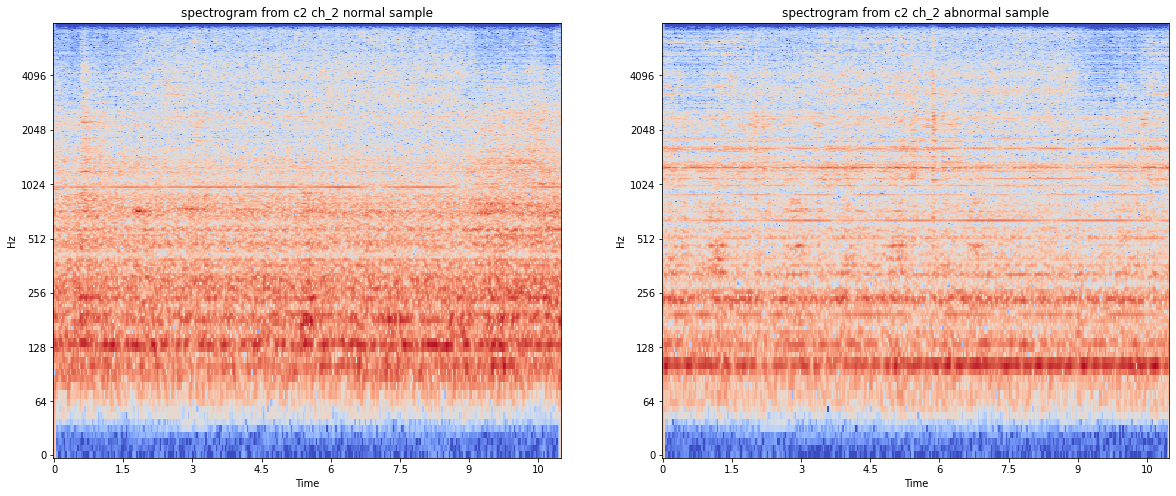

In [5]:
#plot spectogram
waveform_c3_ch2_normal = get_sample_waveform_normalised(access_data("normal",case=3,channel=2).iat[10,0])
waveform_c3_ch2_abnormal = get_sample_waveform_normalised(access_data("abnormal",case=3,channel=2).iat[10,0])

D_normal = librosa.amplitude_to_db(np.abs(librosa.stft(waveform_c3_ch2_normal)))
D_abnormal = librosa.amplitude_to_db(np.abs(librosa.stft(waveform_c3_ch2_abnormal)))

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
librosa.display.specshow(D_normal, y_axis='log', x_axis='time', sr=16000)
plt.title("spectrogram from c2 ch_2 normal sample")

plt.subplot(1,2,2)
librosa.display.specshow(D_abnormal, y_axis='log', x_axis='time', sr=16000)
plt.title("spectrogram from c2 ch_2 abnormal sample")

plt.show()


Frequency domain: MFCC  \
mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.\

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal spectrum \
https://en.wikipedia.org/wiki/Cepstrum   \
https://en.wikipedia.org/wiki/Mel_scale \
They concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

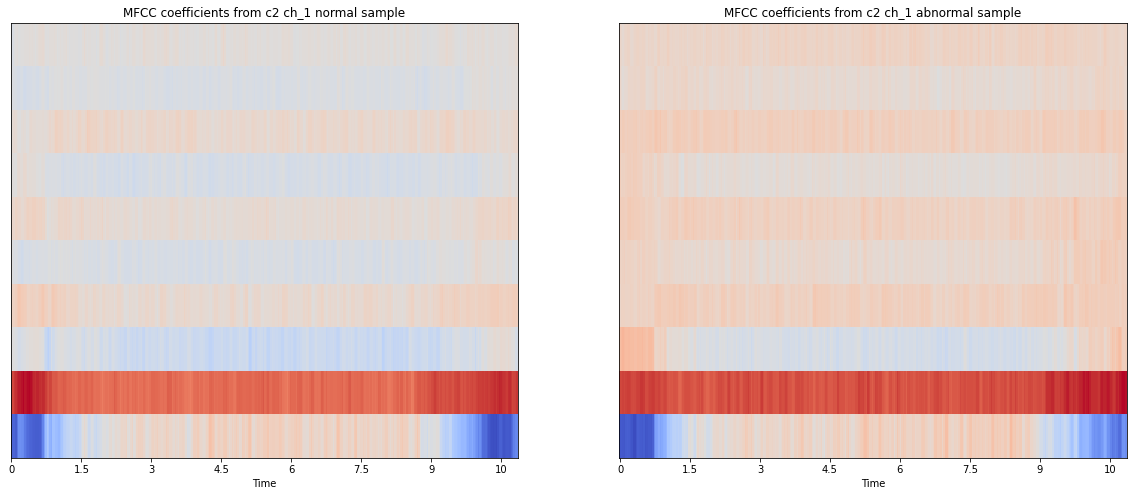

In [6]:
#plot MFCC coefficients
from sklearn import preprocessing
waveform_c2_ch1_normal = get_sample_waveform_normalised(access_data("normal",case=2,channel=1).iat[1,0])
waveform_c2_ch1_abnormal = get_sample_waveform_normalised(access_data("abnormal",case=2,channel=1).iat[1,0])

mfccs_normal  = librosa.feature.mfcc(y = waveform_c2_ch1_normal, sr = 16000, n_mfcc=10, center = False)
mfccs_abnormal  = librosa.feature.mfcc(y =waveform_c2_ch1_abnormal, sr = 16000, n_mfcc=10, center = False)
#mfccs_normal_scaled = preprocessing.scale(mfccs_normal, axis=1)
#mfccs_abnormal_scaled = preprocessing.scale(mfccs_abnormal, axis=1)

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
librosa.display.specshow(mfccs_normal, sr=16000, x_axis='time')
plt.title("MFCC coefficients from c2 ch_1 normal sample")

plt.subplot(1,2,2)
librosa.display.specshow(mfccs_abnormal, sr=16000, x_axis='time')
plt.title("MFCC coefficients from c2 ch_1 abnormal sample")

plt.show()

Frequency domain: frequency magnitude spectrum

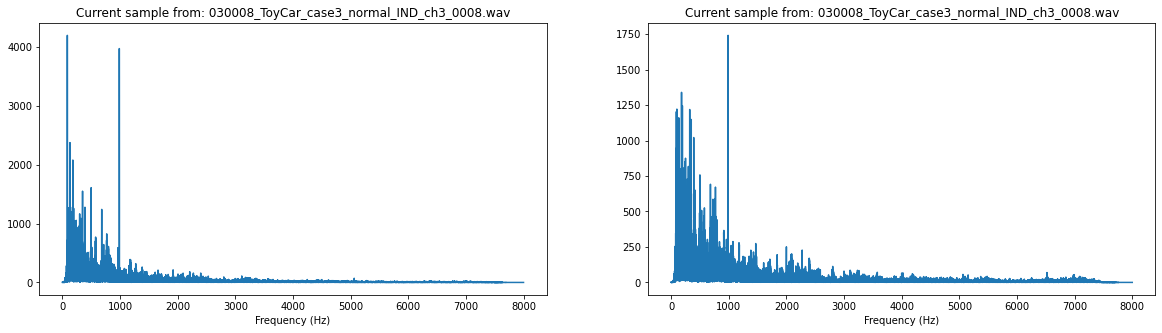

In [7]:
#frequency magnitude spectrum of 2 samples
waveform_c3_ch3_normal = get_sample_waveform_normalised(access_data("normal",case=3,channel=3).iat[1,0])
waveform_c3_ch3_abnormal = get_sample_waveform_normalised(access_data("abnormal",case=3,channel=3).iat[1,0])

#plot magnitude spectrum
def freq_mag_spectrum(signal, sr):
    Y = np.fft.fft(signal)
    Y_mag = np.absolute(Y)
    freq = np.linspace(0, sr, len(Y_mag))    
    #print(Y_mag, len(Y_mag))
    return freq, Y_mag

freq_norm, Y_mag_norm = freq_mag_spectrum(waveform_c3_ch3_normal, 16000)
freq_abnorm, Y_mag_abnorm = freq_mag_spectrum(waveform_c3_ch3_abnormal, 16000)


plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(freq_norm[0:round(len(freq_norm)/2)],Y_mag_norm[0:round(len(freq_norm)/2)])
plt.xlabel('Frequency (Hz)')
plt.title("Current sample from: "+ str(access_data("normal",case=3,channel=3).iat[1,0]))

plt.subplot(1,2,2)
plt.plot(freq_abnorm[0:round(len(freq_abnorm)/2)],Y_mag_abnorm[0:round(len(freq_abnorm)/2)])
plt.xlabel('Frequency (Hz)')
plt.title("Current sample from: "+ str(access_data("abnormal",case=3,channel=3).iat[1,0]))

plt.show()

In [ ]:
len(freq_norm[0:round(len(freq_norm)/2)])

In [140]:
import tqdm
#average frequency spectrum of ALL normal samples compared to all abnormal samples
Matrix_normal = []

case1_Y_mag_normal = np.empty((176000))

case1_normal_data = access_data("normal",case=3,channel=1)  #pd.concat([data_case1_ch_1_normal,data_case1_ch_2_normal, data_case1_ch_3_normal, data_case1_ch_4_normal])

for i in tqdm.tqdm(range(len(case1_normal_data))):    
    waveform_case1 = get_sample_waveform_normalised(case1_normal_data.iloc()[i][0])
    freq_norm, Y_mag_norm = freq_mag_spectrum(waveform_case1, 16000)
    
    Matrix_normal.append(list(Y_mag_norm))

    #case1_Y_mag_normal = np.add(case1_Y_mag_normal, Y_mag_norm)
    

#case1_Y_mag_normal = np.divide(case1_Y_mag_normal,len(case1_normal_data))

################################################################
Matrix_abnormal = []

case1_Y_mag_abnormal = np.empty((176000))
case1_abnormal_data = access_data("abnormal",case=3,channel=1) #pd.concat([data_case1_ch_1_abnormal,data_case1_ch_2_abnormal, data_case1_ch_3_abnormal, data_case1_ch_4_abnormal])

for i in tqdm.tqdm(range(len(case1_abnormal_data))):    
    waveform_case1 = get_sample_waveform_normalised(case1_abnormal_data.iloc()[i][0])
    freq_norm, Y_mag_abnorm = freq_mag_spectrum(waveform_case1, 16000)
    
    Matrix_abnormal.append(list(Y_mag_abnorm))
    
    #case1_Y_mag_abnormal = np.add(case1_Y_mag_abnormal, Y_mag_abnorm)
    
#case1_Y_mag_abnormal = np.divide(case1_Y_mag_abnormal,len(case1_abnormal_data))

#count number of frequencies larger than threshold, maybe useful for size of latent space in autoencoder
# nb_large_freq = (case1_Y_mag_normal[0:round(len(freq_norm)/2)] > 250).sum()
# print(nb_large_freq)

# plt.figure(figsize = (20,5))
# plt.subplot(1,2,1)
# plt.plot(freq_norm[0:round(len(freq_norm)/2)], case1_Y_mag_normal[0:round(len(freq_norm)/2)])
# plt.xlabel('Frequency (Hz)')
# plt.title("Average Freq spectrum of all case 1 normal samples: ")

# plt.subplot(1,2,2)
# plt.plot(freq_abnorm[0:round(len(freq_abnorm)/2)],case1_Y_mag_abnormal[0:round(len(freq_abnorm)/2)])
# plt.xlabel('Frequency (Hz)')
# plt.title("Average Freq spectrum of all case 1 abnormal samples: ")

# plt.show()

100%|██████████| 265/265 [00:13<00:00, 19.59it/s]


In [139]:
np.array(Matrix_normal).shape

KeyboardInterrupt: 

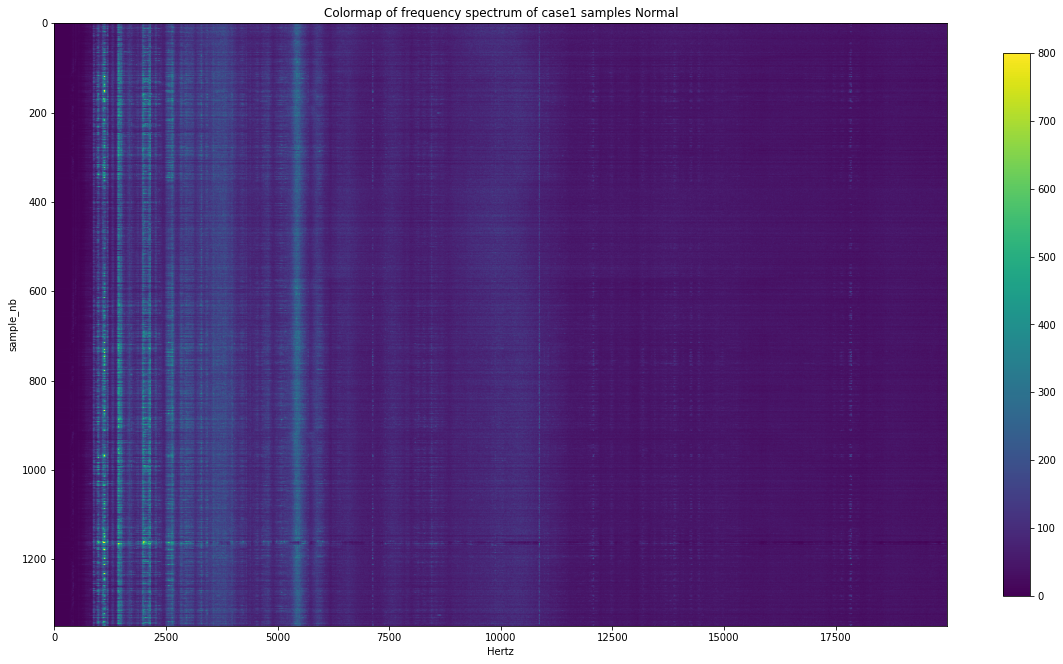

In [151]:
plt.figure(figsize=(20,20))

plt.imshow(np.array(Matrix_normal)[:1350,:20000], vmin = 0, vmax = 800, aspect=10)

plt.xlabel("Hertz")
plt.ylabel("sample_nb")
plt.title("Colormap of frequency spectrum of case1 samples Normal")

plt.colorbar(shrink=0.5)

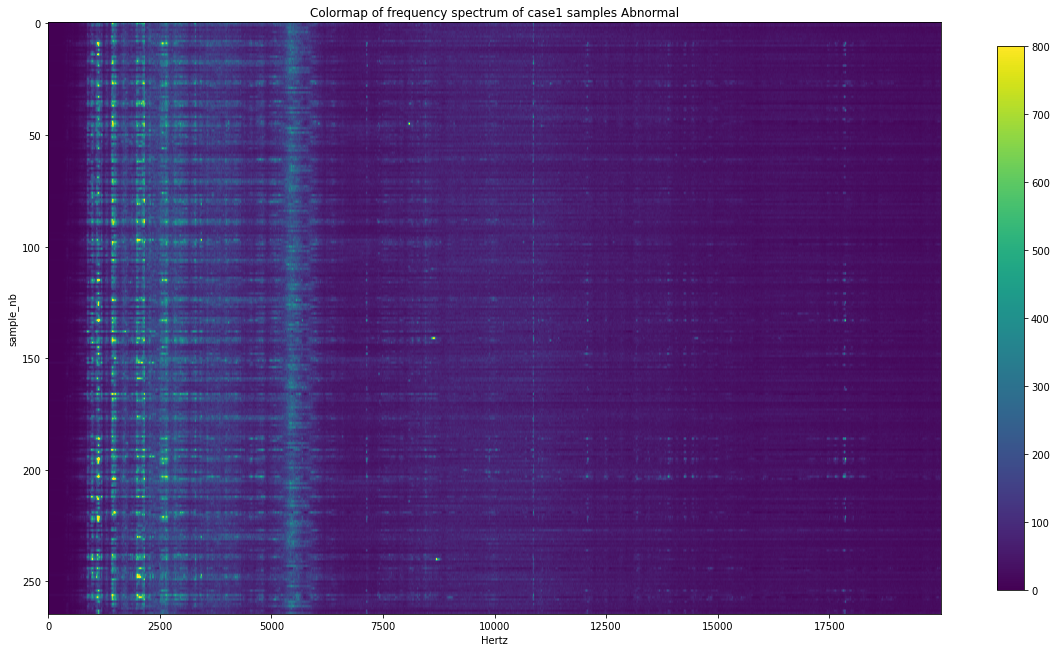

In [153]:
plt.figure(figsize=(20,20))
plt.imshow(np.array(Matrix_abnormal)[:265,:20000], vmin = 0, vmax = 800, aspect = 50)
plt.xlabel("Hertz")
plt.ylabel("sample_nb")
plt.title("Colormap of frequency spectrum of case1 samples Abnormal")

plt.colorbar(shrink = 0.5)


Frequency domain: spectral centroid

In [ ]:
waveform_c3_ch1_normal = get_sample_waveform_normalised(access_data("normal",case=3,channel=1).iloc[10,0])
waveform_c3_ch1_abnormal = get_sample_waveform_normalised(access_data("abnormal",case=3,channel=1).iloc[10,0])

spectral_centroid_normal = librosa.feature.spectral_centroid(y = waveform_c3_ch1_normal, sr=16000)[0]
spectral_centroid_abnormal =  librosa.feature.spectral_centroid(y = waveform_c3_ch1_abnormal, sr=16000)[0]
t = librosa.frames_to_time(range(len(spectral_centroid_normal)), sr = 16000)
##########################################
#get average spectral_centroid_normal and spectral_centroid_abnormal
"""It indicates where the center of mass of the spectrum is located. 
Perceptually, it has a robust connection with the impression of brightness of a sound
"""
#average spectral centroid of ALL normal samples from case 2 compared to all abnormal samples
case2_avg_spec_centroid_normal = np.empty((344))
case2_normal_data = pd.concat([access_data("normal",case=2,channel=1),access_data("normal",case=2,channel=2), access_data("normal",case=2,channel=3), access_data("normal",case=2,channel=4)])

for i in range(len(case2_normal_data)):    
    waveform_case2 = get_sample_waveform_normalised(case2_normal_data.iloc()[i][0])
    spectral_centroid_normal = librosa.feature.spectral_centroid(y = waveform_case2, sr=16000)[0]
    
    case2_avg_spec_centroid_normal = np.add(case2_avg_spec_centroid_normal, spectral_centroid_normal)

case2_avg_spec_centroid_normal = np.divide(case2_avg_spec_centroid_normal,len(case2_normal_data))
   

################################################################
case2_avg_spec_centroid_abnormal = np.empty((344))
case2_abnormal_data = pd.concat([access_data("abnormal",case=2,channel=1),access_data("abnormal",case=2,channel=2), access_data("abnormal",case=2,channel=3), access_data("abnormal",case=2,channel=4)])

for i in range(len(case2_abnormal_data)):    
    waveform_case2 = get_sample_waveform_normalised(case2_abnormal_data.iloc()[i][0])
    spectral_centroid_abnormal = librosa.feature.spectral_centroid(y = waveform_case2, sr=16000)[0]
    
    case2_avg_spec_centroid_abnormal = np.add(case2_avg_spec_centroid_abnormal, spectral_centroid_abnormal)

case2_avg_spec_centroid_abnormal = np.divide(case2_avg_spec_centroid_abnormal,len(case2_abnormal_data))
   

t_norm = librosa.frames_to_time(range(len(case2_avg_spec_centroid_normal)), sr = 16000)
t_abnorm = librosa.frames_to_time(range(len(case2_avg_spec_centroid_abnormal)), sr = 16000)



In [ ]:
waveform_normal = get_sample_waveform_normalised(access_data("normal",case=3,channel=1).iat[1,0])
waveform_abnormal = get_sample_waveform_normalised(access_data("abnormal",case=3,channel=1).iat[1,0])
D_normal = librosa.amplitude_to_db(np.abs(librosa.stft(waveform_normal)))
D_abnormal = librosa.amplitude_to_db(np.abs(librosa.stft(waveform_abnormal)))

################################

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20,15))
plt.subplot(2,1,1)
librosa.display.specshow(D_normal, y_axis='log', x_axis='time', sr=16000)
plt.plot(t, spectral_centroid_normal, label = "Spectral centroid", color = "g")
#plt.plot(t_norm, case2_avg_spec_centroid_normal, label = "Average Spectral centroid Normal", color = "b")
plt.legend(loc = "upper right")
ax[0].set(title='Spectrogram from case3 ch1 normal sample ')

plt.subplot(2,1,2)
librosa.display.specshow(D_abnormal, y_axis='log', x_axis='time', sr=16000)
plt.plot(t, spectral_centroid_abnormal, label = "Spectral centroid", color = "g")
#plt.plot(t_abnorm, case2_avg_spec_centroid_abnormal,  label = "Average Spectral centroid abnormal", color = "b")
plt.legend(loc = "upper right")
ax[1].set(title='Spectrogram from case3 ch1 abnormal sample ')
plt.colorbar(ax=ax, format="%+2.f dB")

plt.show()


spectral entropy, renyi entropy, tsallis entropy

Pure white noise has the highest spectral entropy. \
https://dsp.stackexchange.com/questions/23689/what-is-spectral-entropy  \
https://nl.mathworks.com/help/signal/ref/pentropy.html#mw_a57f549d-996c-47d9-8d45-e80cb739ed41

In [12]:
import antropy
import math
def get_entropy_of_all_channels(case_number:int):
    #normal-abnormal pairs per channel
    datas = [[access_data("normal", case_number, i + 1), access_data("abnormal", case_number, i + 1)] for i in range(4)]
    results_dict = {}
    
    for ch_index, data in enumerate(datas): #loop over the four channels
        normal_data, abnormal_data = data
        
        entropy_normal = []
        for i in range(len(normal_data)):    
            waveform_normal = get_sample_waveform_normalised(normal_data.iat[i,0])
            entropy = antropy.spectral_entropy(waveform_normal, sf = 16000, normalize = True)
            if not(math.isnan(entropy)):
                entropy_normal.append(entropy)

                    
        entropy_abnormal = []
        for i in range(len(abnormal_data)):    
            waveform_abnormal = get_sample_waveform_normalised(abnormal_data.iat[i,0])
            entropy = antropy.spectral_entropy(waveform_abnormal, sf = 16000, normalize = True)
            if not(math.isnan(entropy)):
                entropy_abnormal.append(entropy)
            
        results_dict.update([(f'entropy_normal_case{case_number}_channel{ch_index+1}', entropy_normal),
                             (f'entropy_abnormal_case{case_number}_channel{ch_index+1}',entropy_abnormal),
                             ])
    return results_dict

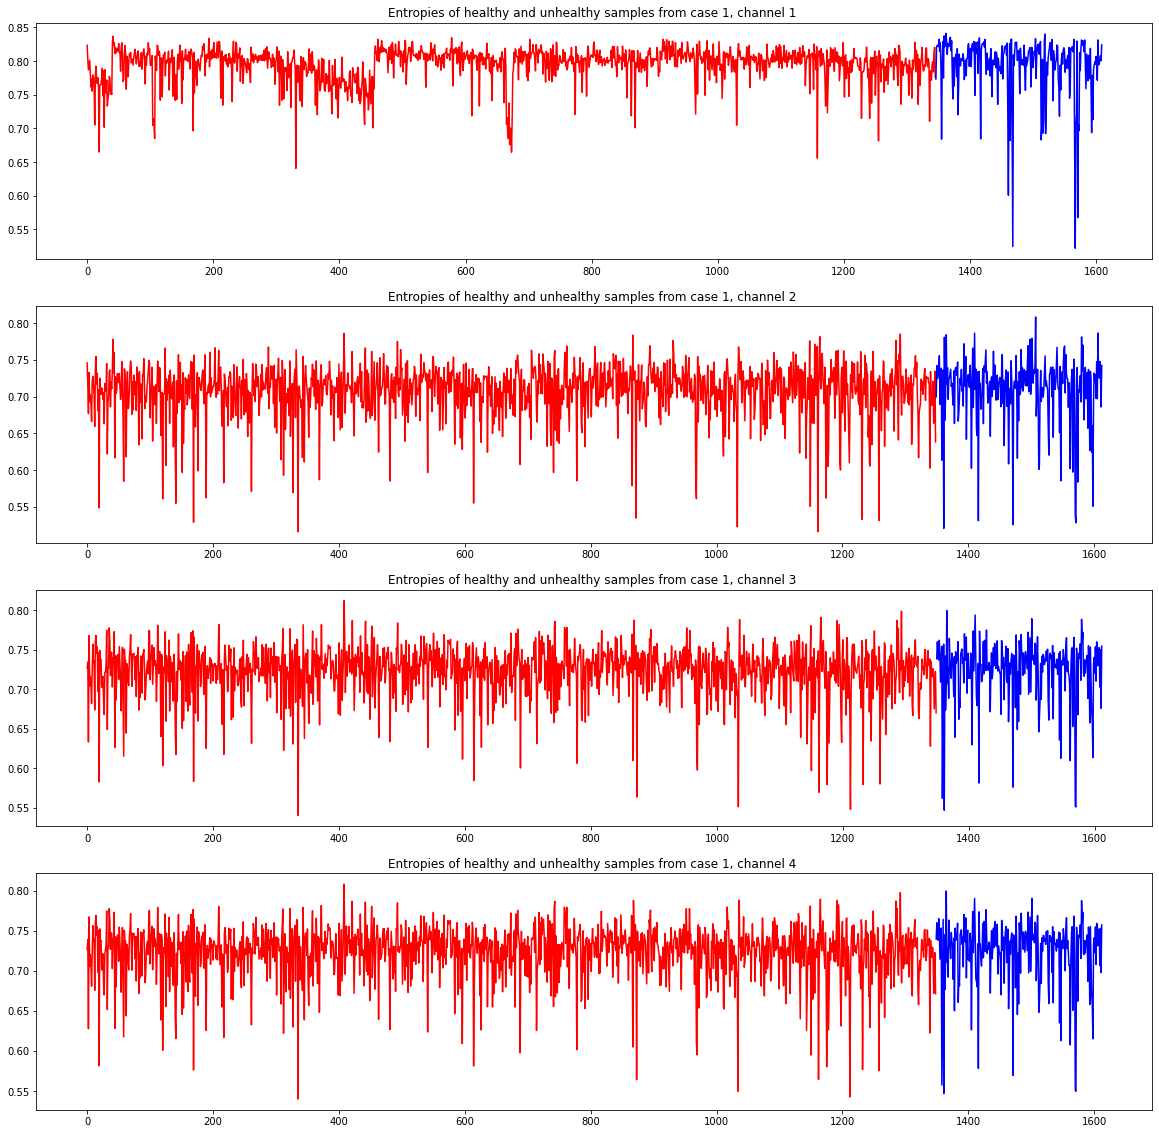

In [15]:
case1_entropy = get_entropy_of_all_channels(case_number=1)
 

entropy_normal_case1_channel1= case1_entropy.get('entropy_normal_case1_channel1')   
entropy_abnormal_case1_channel1 = case1_entropy.get('entropy_abnormal_case1_channel1')    
plt.figure(figsize = (20,20))
plt.subplot(4,1,1)
plt.title(f"Entropies of healthy and unhealthy samples from case 1, channel 1 ")
plt.plot(entropy_normal_case1_channel1, color="r")
plt.plot(range(len(entropy_normal_case1_channel1), len(entropy_normal_case1_channel1)+len(entropy_abnormal_case1_channel1)), entropy_abnormal_case1_channel1, color="b")

entropy_normal_case1_channel2 = case1_entropy.get('entropy_normal_case1_channel2')   
entropy_abnormal_case1_channel2 = case1_entropy.get('entropy_abnormal_case1_channel2')    
plt.subplot(4,1,2)
plt.title(f"Entropies of healthy and unhealthy samples from case 1, channel 2 ")
plt.plot(entropy_normal_case1_channel2, color="r")
plt.plot(range(len(entropy_normal_case1_channel2), len(entropy_normal_case1_channel2)+len(entropy_abnormal_case1_channel2)), entropy_abnormal_case1_channel2, color="b")

entropy_normal_case1_channel3 = case1_entropy.get('entropy_normal_case1_channel3')   
entropy_abnormal_case1_channel3 = case1_entropy.get('entropy_abnormal_case1_channel3')    
plt.subplot(4,1,3)
plt.title(f"Entropies of healthy and unhealthy samples from case 1, channel 3 ")
plt.plot(entropy_normal_case1_channel3, color="r")
plt.plot(range(len(entropy_normal_case1_channel3), len(entropy_normal_case1_channel3)+len(entropy_abnormal_case1_channel3)), entropy_abnormal_case1_channel3, color="b")

entropy_normal_case1_channel4 = case1_entropy.get('entropy_normal_case1_channel4')   
entropy_abnormal_case1_channel4 = case1_entropy.get('entropy_abnormal_case1_channel4')    
plt.subplot(4,1,4)
plt.title(f"Entropies of healthy and unhealthy samples from case 1, channel 4 ")
plt.plot(entropy_normal_case1_channel4, color="r")
plt.plot(range(len(entropy_normal_case1_channel4), len(entropy_normal_case1_channel4)+len(entropy_abnormal_case1_channel4)), entropy_abnormal_case1_channel4, color="b")

plt.show()

NameError: name 'setBoxColors' is not defined

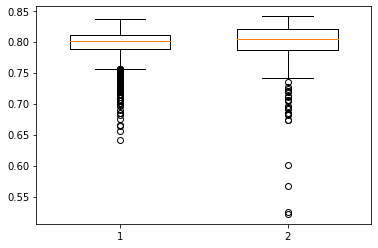

In [16]:
#entropy  boxplot
A = [entropy_normal_case1_channel1, entropy_abnormal_case1_channel1]
B = [entropy_normal_case1_channel2, entropy_abnormal_case1_channel2]
C = [entropy_normal_case1_channel3, entropy_abnormal_case1_channel3]
D = [entropy_normal_case1_channel4, entropy_abnormal_case1_channel4]

plt.figure()
ax = plt.axes()

bp = plt.boxplot(A, positions = [1, 2], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(B, positions = [4, 5], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(C, positions = [7, 8], widths = 0.6)
setBoxColors(bp)

bp = plt.boxplot(D, positions = [10, 11], widths = 0.6)
setBoxColors(bp)

# set axes limits and labels
ax.set_xticklabels(['Entropy_ch1', ' ', 'Entropy_ch2',' ', 'Entropy_ch3', ' ', 'Entropy_ch4', ' '])
 
# draw temporary red and blue lines and use them to create a legend

red_patch = mpatches.Patch(color='red', label='Normal data')
blue_patch = mpatches.Patch(color='blue', label='Abnormal data')

plt.legend(handles=[red_patch, blue_patch])
plt.title("Entropy overview of case 1")
plt.show()
